In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download Datasets


In [4]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98%|████████████████████████████████████████▎| 146M/149M [00:01<00:00, 116MB/s]
100%|█████████████████████████████████████████| 149M/149M [00:01<00:00, 110MB/s]


In [5]:
def get_class_paths(path):
    classes = []  # List to store class labels
    class_paths = []  # List to store paths to images
    
    # Iterate over each label in the given directory
    for label in os.listdir(path):
        label_path = os.path.join(path, label)  # Construct the full path to the label directory
        
        if os.path.isdir(label_path):  # Check if the path is a directory
            # Iterate over each image in the label directory
            for img in os.listdir(label_path):
                img_path = os.path.join(label_path, img)  # Construct the full path to the image
                
                classes.append(label)  # Append the label to the classes list
                class_paths.append(img_path)  # Append the image path to the class_paths list
    
    # Create a DataFrame with the collected class paths and labels
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })
    return df  # Return the DataFrame

In [6]:
tr_df = get_class_paths('../data/Training')
tr_df

,Class Path,Class
0,../data/Training/notumor/Tr-no_1480.jpg,notumor
1,../data/Training/notumor/Tr-no_0104.jpg,notumor
2,../data/Training/notumor/Tr-no_1342.jpg,notumor
3,../data/Training/notumor/Tr-no_1298.jpg,notumor
4,../data/Training/notumor/Tr-no_1133.jpg,notumor
...,...,...
5707,../data/Training/glioma/Tr-gl_0454.jpg,glioma
5708,../data/Training/glioma/Tr-gl_0441.jpg,glioma
5709,../data/Training/glioma/Tr-gl_1050.jpg,glioma
5710,../data/Training/glioma/Tr-gl_0307.jpg,glioma


In [7]:
ts_df = get_class_paths('../data/Testing')
ts_df

,Class Path,Class
0,../data/Testing/notumor/Te-no_0346.jpg,notumor
1,../data/Testing/notumor/Te-no_0338.jpg,notumor
2,../data/Testing/notumor/Te-no_0019.jpg,notumor
3,../data/Testing/notumor/Te-no_0096.jpg,notumor
4,../data/Testing/notumor/Te-no_0136.jpg,notumor
...,...,...
1306,../data/Testing/glioma/Te-gl_0024.jpg,glioma
1307,../data/Testing/glioma/Te-gl_0231.jpg,glioma
1308,../data/Testing/glioma/Te-gl_0220.jpg,glioma
1309,../data/Testing/glioma/Te-gl_0277.jpg,glioma


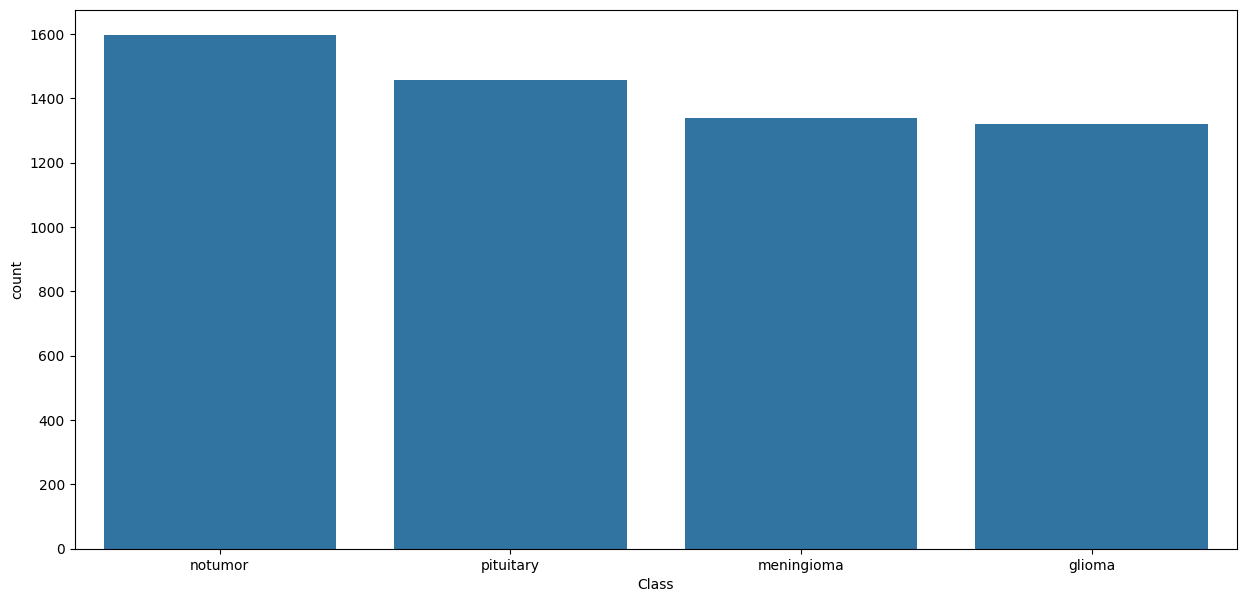

In [8]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(tr_df, x=tr_df['Class'])

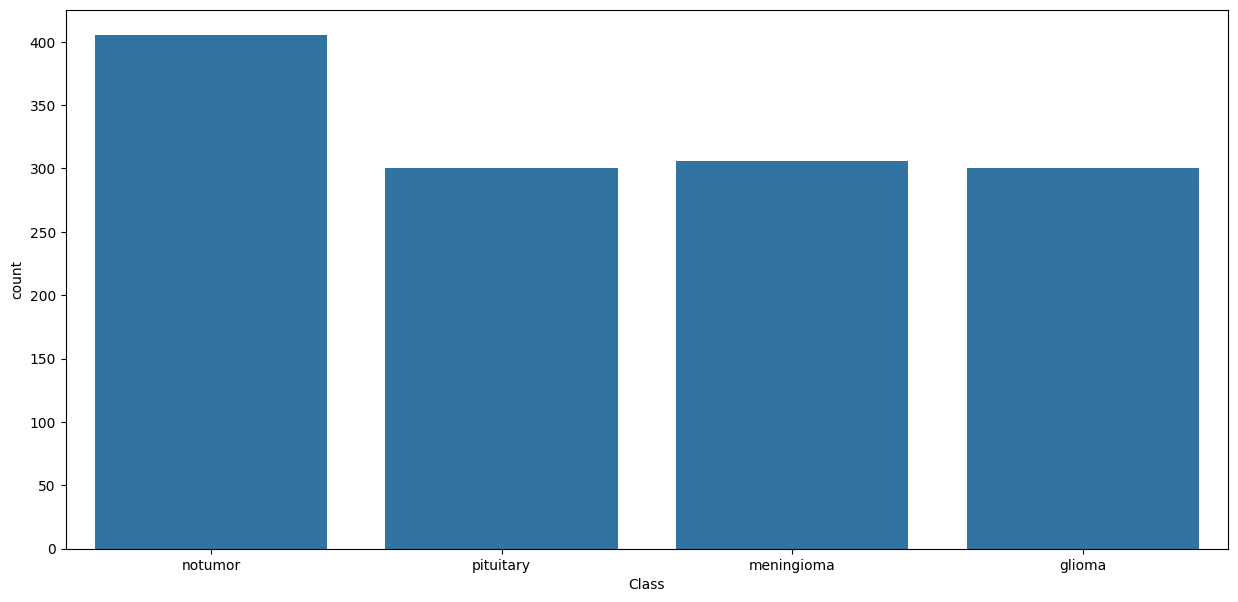

In [9]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(ts_df, x=ts_df['Class'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [15]:
valid_df

,Class Path,Class
886,../data/Testing/meningioma/Te-me_0240.jpg,meningioma
473,../data/Testing/pituitary/Te-pi_0187.jpg,pituitary
554,../data/Testing/pituitary/Te-pi_0243.jpg,pituitary
206,../data/Testing/notumor/Te-no_0110.jpg,notumor
493,../data/Testing/pituitary/Te-pi_0177.jpg,pituitary
...,...,...
1081,../data/Testing/glioma/Te-gl_0289.jpg,glioma
1164,../data/Testing/glioma/Te-gl_0150.jpg,glioma
1057,../data/Testing/glioma/Te-gl_0104.jpg,glioma
915,../data/Testing/meningioma/Te-me_0088.jpg,meningioma


In [16]:
ts_df

,Class Path,Class
817,../data/Testing/meningioma/Te-me_0138.jpg,meningioma
167,../data/Testing/notumor/Te-no_0375.jpg,notumor
1193,../data/Testing/glioma/Te-gl_0279.jpg,glioma
330,../data/Testing/notumor/Te-no_0351.jpg,notumor
688,../data/Testing/pituitary/Te-pi_0130.jpg,pituitary
...,...,...
642,../data/Testing/pituitary/Te-pi_0254.jpg,pituitary
779,../data/Testing/meningioma/Te-me_0154.jpg,meningioma
746,../data/Testing/meningioma/Te-me_0040.jpg,meningioma
0,../data/Testing/notumor/Te-no_0346.jpg,notumor


In [ ]:
BATCH_SIZE = 64
img_size = (299, 299)
img_gen = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))